# Detecção de Outliers

## Importar as bibliotecas necessárias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## Problema
Implementar um algoritmo de detecção de anomalias e aplicá-lo para detectar falhas em servidores em uma rede.<br>
Usar um modelo baseado na Gaussiana Multivariada para detectar observações anômalos.<br>
O exercício é dividido em duas partes:
* Parte 1: Ajustar a distribuição Gaussiana Multivariada para um dataset com duas variáveis (bidimensional)
* Parte 2: Aplicar o algoritmo de detecção de anomalia para um dataset com maior número de dimensões

# Parte 1 - Dataset bidimensional
* Passo 1 - Carregar dados
* Passo 2 - Visualizar dados de treinamento
* Passo 3 - Treinaar o modelo
* Passo 4 - Verificar aderência do modelo
* Passo 5 - Ajustar o modelo
* Passo 6 - Visualizar as anomalias no conjunto de treinamento

### Passo 1 - Carregar dados

Usar dois arquivos, o primero com dados de treinamento e o segundo com dados de validação.<br>
* Os dados de treinamento consistem de 307 observaçoes de latência e throughput do servidor, as duas características (features) que serão usadas no treinamento não supervisionado, e serão carregados na matriz Xtre, com os dados de latência na coluna 1 e de throughput na coluna 2.<br>
* Os dados de validação consistem consistem de 307 observações rotuladas. Os valores das caracteristicas são carregados na matriz Xval eos rátulos na matriz Yval<br>
* Assume-se que os dados possuem distribuição normal.

In [3]:
# Leitura do arquivo com dados de treinamento
Xtre = np.loadtxt('DadosTreinamento1.csv', delimiter=',')
print(np.shape(Xtre))

# Array com dados de latência
latencia = Xtre[:,0]
# Array com dados de throughput
throughput = Xtre[:,1]

(307, 2)


In [4]:
# Leitura do arquivo com dados de validação
XYval = np.loadtxt('DadosValidacao1.csv', delimiter=',')
Xval = XYval[:,[0,1]]
Yval = XYval[:,2]

### Passo 2 - Visualizar dados de treinamento
Cosntruir o histograma dos dados de latência e troughput.
Plotar o diagrama de dispersão.

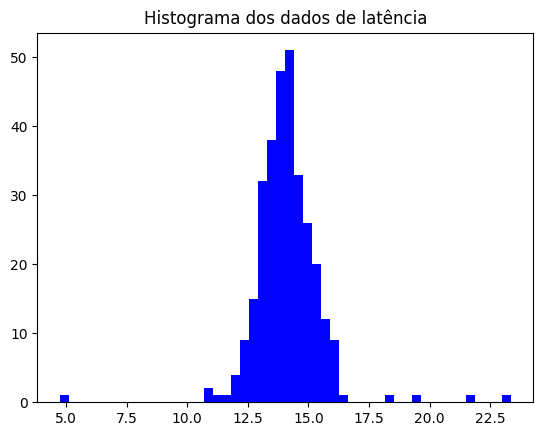

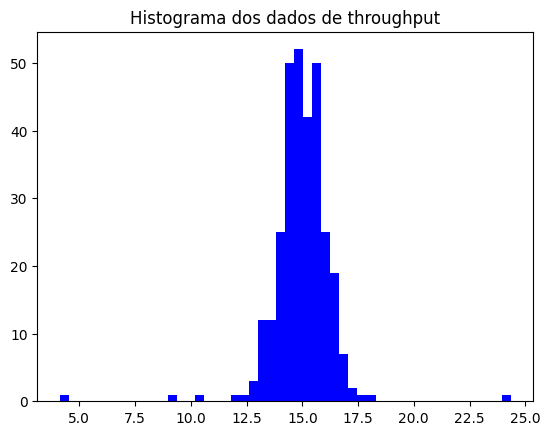

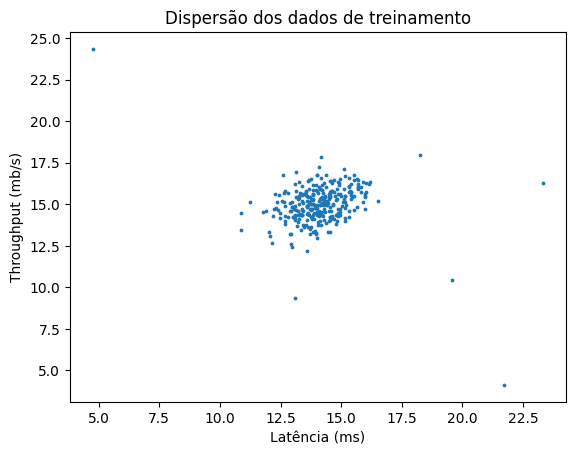

In [5]:
# Histrograma dos dados de latência
plt.hist(latencia,50,facecolor='blue')
plt.title("Histograma dos dados de latência")
plt.show()

# Histrograma dos dados de troughput
plt.hist(throughput,50,facecolor='blue')
plt.title("Histograma dos dados de throughput")
plt.show()

# Diagrama de dispersão dos dados de treinamento
plt.scatter(latencia,throughput, s=3)
plt.xlabel('Latência (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title("Dispersão dos dados de treinamento")
plt.show()

### Passo 3 - Treinar o modelo
A fase de treinamento do algoritmo consiste basicamente no cálculo dos parâmetros da distribuição Gaussiana multivariada. A distribuição será utilizada para classificar novos dados como anomalia ou não. Na Parte 1 estamos utilizando a Gaussiana Bivariada como modelo (apenas duas variáveis), mas o algoritmo precisa ser matricial para que possa usado com mais variáveis.<br><br>
O treinamento consiste em calcular o vetor de médias e a matriz de covariância.<br><br>

Se o seu código estiver correto você deve encontrar os seguintes valores:
* Vetor de médias:<br>
$\begin{bmatrix}
14.11222578 & 14.99771051
\end{bmatrix}$<br><br>
* Matriz de covariância<br>
$\begin{bmatrix}
[ 1.83862041 & -0.22786456 ]\\ 
[ -0.22786456 & 1.71533273 ]
\end{bmatrix}$

In [21]:
# Calcular o vetor de médias das colunas de Xtre
# Substituir o comando abaixo pelo cálculo do vetor de médias
# Dica: usar np.mean
MU = np.mean(Xtre, axis=0)
print('Vetor de médias')
print(MU)

# Calcular a matriz de covariancia
# A função np.cov espera como argumento uma matriz
# Nessa matriz, cada variável deve estar em uma linha
# Portanto é necessário usar a transposta de Xtre (Xtre.T)
# Dica Usar np.cov
# Substituir o comando abaixo pelo cálculo da matriz de covariância
# Dica: usa np.cov
SIGMA = np.cov(Xtre.T)
print('\nMatriz de covarância')
print(SIGMA)

Vetor de médias
[14.11222578 14.99771051]

Matriz de covarância
[[ 1.83862041 -0.22786456]
 [-0.22786456  1.71533273]]


### Passo 4 - Vizualizar aderência dos dados ao modelo
* Visualizar o gráfico tridimensional da Gaussiana Multivariada
* Visualizar as curvas de nível da distribuição normal multivariada junto com o gráfico de dispersão das variáeis (latência e throughput)

#### Vizualizar o gráfico tridimensional da Gaussiana Multivariada

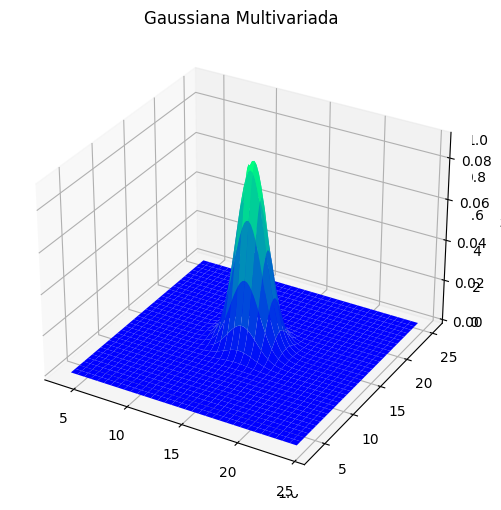

In [22]:
# Definir a função multivariada
nmv = multivariate_normal(MU, SIGMA)

# Coordenadas X, Y e Z
x = np.linspace(np.min(latencia)-1, np.max(latencia)+1, 100)
y = np.linspace(np.min(throughput)-1, np.max(throughput)+1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = nmv.pdf(pos)

# Criar os objetos figure e axes
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")

# Rótulos dos eixos x, y, z
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Título do gráfico
ax.set_title('Gaussiana Multivariada');

# Plotagem
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1,
                cmap='winter', edgecolor='none')
plt.show()

#### Visualizar curvas de nível e dados de treinamento

Text(0.5, 1.0, 'Aderência dos dados ao modelo')

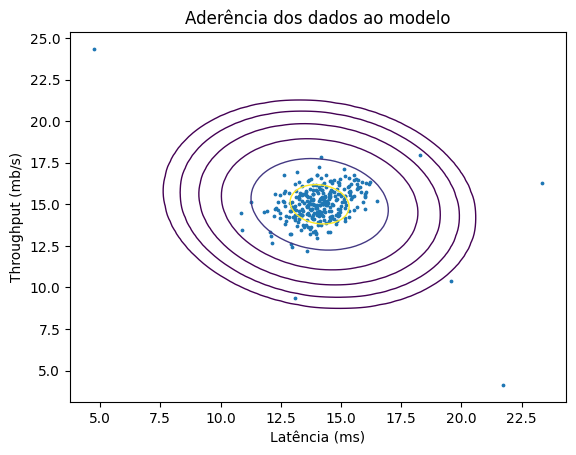

In [23]:
fig, ax = plt.subplots()
contorno = ax.contour(X, Y, Z, 6,
           levels=(0.000001,0.00001,0.0001,0.001,0.01,0.06),
           linewidths=1.0)

ax.autoscale(False)
ax.scatter(latencia,throughput,zorder=1,s=3)

ax.set_xlabel('Latência (ms)')
ax.set_ylabel('Throughput (mb/s)')
ax.set_title('Aderência dos dados ao modelo')

### Passo 5: Ajustar o modelo
No gráfico anterior podemos observar apenas quatro pontos fora da curva de contorno no nível 0.000001 (o nível mais externo).<br>

O ajuste de modelo é um algoritmo que calcula o nível (limiar) da coordenada Z (valor da pmf) a partir do qual os dados são considerados como anomalias (outliers). O algoritmo de ajuste escolhe o limiar que faz as melhores previsões.<br>

O algoritmo de ajuste do modelo utiliza os dados de validação. Os dados de validação precisam ser rotulados, isto é, para cada conjunto de valores das variáveis do modelo, precisamos da indicação (rótulo) se aquele conjunto de valores corresponde a uma anomalia (valor 1) ou não(valor 0).<br>

A matriz Xval (caregada no Passo 1) tem os dados para validação de latência e throughput (colunas 1 e 2), enquanto que o vetor Yval que tem os valores rotulados correspondentes. Yval é um vetor de 0s e 1s sendo que 1 significa dados com anomaila e 0 dados sem anomalia.<br>

#### Algoritmo de ajuste


##### Selecionar limiar
O algoritmo está implementado na função selecionarLimiar. Para escolher o melhor limiar a algoritmo utiliza a métrica F1. Consiste em um laço que varre todos os valores no vetor $Pval$ para escolher o valor que produz o maior valor resultado.
\===================================================================<br>
\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* Algoritmo para determinar o valor do limiar \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*
\===================================================================
* Recebe como argumento o vetor Pval e o vetor Yval
* Transformar Yval em boleano e salvar e Real
  * Real = Yval.astype(np.bool)
* Inicia os valores das variáveis locais usadas no algoritmo
  * melhorLimiar = 0
  * melhorF1 = 0
* Variar os valores de limiar de $min(Pval)$ a $max(Pval)$ com passo igual $(max(Pval) - min(Pval)) / 1000$
* Para cada valor do limiar
  * Calcular o vetor de previsões do modelo
   * Prev = limiar < Pval
   * Ao comparamos o valor do limiar como vetor Pval o resultado será um vetor de valores booleanos que satifazem a condição que é aolvo no vetor Prev
  * Calcular a quantidade de verdadeiros positivos (vp)
   * Calcular um vetor booleano de acordo com a seguinte expressão lógica:
     * Real == anomalia E Previsto == anomalia
     * Dica: np.logical_and((Prev == 1.0),(Yval == 1.0))
    * Somar a quantidade de True e salvar em vp<br>
     * Dica: vp = np.count_nonzero(np.logical_and((Prev == 1.0),(Yval == 1.0))) 
  * Calcular a quantidade de falsos positivos (fp)
   * Calcular um vetor booleano de acordo com a seguinte expressão lógica:
     * Real == anomalia E Previsto == não anomalia
     * Dica: np.logical_and((Prev == 1.0),(Yval == 0.0))
    * Somar a quantidade de True e salvar em fp<br>
     * Dica: fp = np.count_nonzero(np.logical_and((Prev == 1.0),(Yval == 0.0))) 
  * Calcular a quantidade de falsos negativos (fn)
   * Calcular um vetor booleano de acordo com a seguinte expressão lógica:
     * Real == não anomalia E Previsto == anomalia
     * Dica: np.logical_and((Prev == 0.0),(Yval == 1.0))
    * Somar a quantidade de True e salvar em fp<br>
     * Dica: fn = np.count_nonzero(np.logical_and((Prev == 0.0),(Yval == 1.0))) 
  * Calcular F1
  * Se F1 > melhorF1
    * melhorF1 = F1
    * melhorLimiar = limiar

\===================================================================

###### Completar o código da função slelecionarLimiar

In [27]:
def selecionarLimiar(Pval, Yval):
    # Iniciar os valores das variáveis locais
    melhorLimiar = 0
    melhorF1 = 0
    F1 = 0
    Real = Yval.astype(np.bool)
    
    passo = (np.max(Pval) - np.min(Pval)) / 1000
    # print(np.arange(np.min(Pval), np.max(Pval), passo))
    for limiar in np.arange(np.min(Pval), np.max(Pval), passo):
        # Calcular o vetor de previsões
        Prev = (Pval < limiar).astype(np.float64)

        # Calcular os verdadeiros positivos
        vp = np.count_nonzero(np.logical_and((Prev == 1),(Yval == 1)))

        ###############################################################
        # Substituir o comando abaixo para calcular os falsos positivos
        fp = np.count_nonzero(np.logical_and((Prev == 1.0),(Yval == 0.0)))

        ###############################################################
        # Substituir o comando abaixo para calcular os falsos negativos
        fn = np.count_nonzero(np.logical_and((Prev == 0.0),(Yval == 1.0)))
        
        if vp !=0:
            # Calcular F1
            prec = vp/(vp+fp)  # calcular prec
            rec = vp/(vp+fn)   # calcular rec
            F1 = (2*prec*rec) / (prec+rec)  # calcular de F1
        
        # Se o novo valor de F1 é melhor do que o melhor até agora
        #Salva o valor atual de F1 e de epsilon em melhorF1 e melhorEpisilon
        if F1 > melhorF1:
            melhorF1 = F1
            melhorLimiar = limiar
            
    return melhorF1, melhorLimiar

##### Preparar dos dados
Para selecionar o limiar de decisão utilizamos os dados de treinamento: matriz de dados das variáveis $Xval$ e vetor de rótulos $Yval$.<br><br>
A função $selecionaLimiar$ recebe como argumento os valores de probabilidade das variáveis de validação ($Pval$) que são calculados pela Gaussiana Multivariada (com parâmetros $MU$ e $SIGMA$).<br><br>
Realizar os seguintes passos: 
* Chamar a função Gaussiana Multivariada passando os dados de validação ($Xval$) como argumento armazenando o resultado array $Pval$
* Chamar a função $selecionarLimiar$ passando como argumentos $Pval$ e $Yval$

In [28]:
Pval = nmv.pdf(Xval)
F1, limiar = selecionarLimiar(Pval,Yval)
print(limiar)
print(F1)
print('Se o algoritmo estiver certo, o valor do limiar deve ser 9.036141e-05')

9.036240676156382e-05
0.8750000000000001
Se o algoritmo estiver certo, o valor do limiar deve ser 9.036141e-05


### Passo 6 - Visualizar as anomalias no conjunto de treinamento
* Encontrar as anomalias no conjunto de treinamento
* Plotar anomalias do conjunto de treinamento

In [29]:
#  Encontrar e as anomalias no conjunto de treinamento

# Calcular a probabilidade de cada variável em Xtre
p = nmv.pdf(Xtre)

# As anomalias são os elementos cuja probabilidade é menor do que o limiar
anomalias = Xtre[p < limiar]

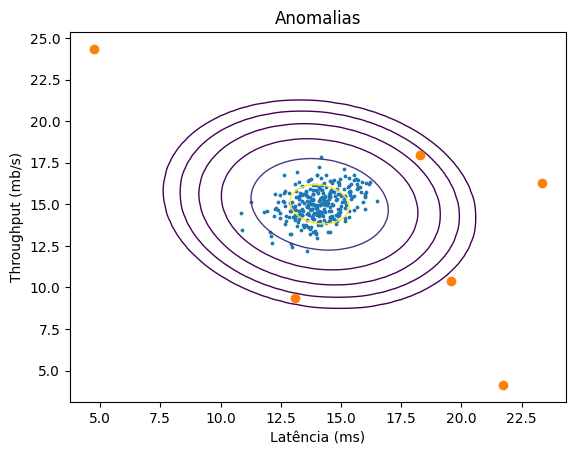

In [30]:
# Plotar anomalias do conjunto de treinamento
fig, ax = plt.subplots()
contorno = ax.contour(X, Y, Z, 6,
           levels=(0.000001,0.00001,0.0001,0.001,0.01,0.06),
           linewidths=1.0)

ax.autoscale(False)
ax.scatter(latencia,throughput,zorder=1,s=3)
ax.scatter(anomalias[:,0],anomalias[:,1],zorder=2)

ax.set_xlabel('Latência (ms)')
ax.set_ylabel('Throughput (mb/s)')
ax.set_title('Anomalias');

# Parte 2 - Dataset multidimensional

Na Parte 2 vamos utilizar os arquivos DadosTreinamento2.csv, DadosValidacao2.csv e DadosTeste2.csv, que contêm dados de treinamento e validação e teste. Os arquivos com dados de validação e teste tambem incluem dados rotulados (Y) para uso em validação e teste.<br><br>

Nos arquivos da Parte 2  foram coletadas 11 variáveis de desempenho dos servidores. Não é possível fazer as vizualizações que foram feitas na Parte 1, mas os algoritmos que foram implementados podem ser usados aqui, porque o tratamento é válido para matrizes de dados de quaisquer dimensões.

* Passo 1 - Carregar dados
* Passo 2 - Treinar o modelo
* Passo 3 - Ajustar o modelo
* Passo 4 - Testar o modelo

### Passo 1 - Carregar dados

In [31]:
# Leitura do arquivo com dados de treinamento
Xtre = np.loadtxt('DadosTreinamento2.csv', delimiter=',')
print(Xtre.shape)

# Leitura do arquivo com dados de validação
XYval = np.loadtxt('DadosValidacao2.csv', delimiter=',')
Xval = XYval[:,[0,1,2,3,4,5,6,7,8,9,10]]
print(Xval.shape)
Yval = XYval[:,11]
print(Yval.shape)

(600, 11)
(100, 11)
(100,)


### Passo 2 - Treinar o modelo
* Calcular o vetor de médias
* Calcular a matriz de covariância
* Definir a função Gaussiana multivariada

In [33]:
# Calcular o vetor de médias das colunas de Xtre
###############################################
# Mesmo comando usado na parte 1
MU = np.mean(Xtre, axis=0)

# Calcular a matriz de covariancia
################################################
# Mesmo comado usado na parte 1
SIGMA = np.cov(Xtre.T)

# Definir a função multivariada
nmv = multivariate_normal(MU, SIGMA)

### Passo 3: Ajustar o modelo

In [34]:
Pval = nmv.pdf(Xval)
F1, limiar = selecionarLimiar(Pval,Yval)
print(limiar)
print(F1)
print('O valor do limiar deve ser 1.824432e-18')

1.824432150223497e-18
0.5333333333333333
O valor do limiar deve ser 1.824432e-18


### Passo 4: Testar o modelo
Calcular as métricas F1 para os dados de teste correspondentes a anomalias.<br>
* Carregar o arquivo DadosTeste2.csv
* Calcular a métrica exatidão (accuracy)<br>
$acc =\frac{vp+vn}{vp+fp+vn+fn}$
* Calcular a métrica precisão (precision)<br>
$prec = \frac{vp}{vp+fp}$
* Calcular a métrica revocação (recall)<br>
$rec = \frac{vp}{vp+fn}$
* Calcular a métrica F1<br>
$F1 = \frac{2\cdot prec \cdot rec}{prec+rec}$

In [39]:
# Leitura do arquivo com dados de teste
XYtest = np.loadtxt('DadosTeste2.csv', delimiter=',')
# Onze primeiras colunas contêm os dados das variáveis
Xtest = XYtest[:,[0,1,2,3,4,5,6,7,8,9,10]]

# Última coluna contém os rótulos
Ytest = XYtest[:,11]
# print(Ytest.shape)

# Encontrar as anomalias no conjunto de teste
Pval = nmv.pdf(Xtest)

# Previsões do modelo
Yprev = (Pval < limiar).astype(np.float64)

# Verdadeiros positivos
vp = np.count_nonzero(np.logical_and((Yprev == 1),(Ytest == 1)))

#################################################################
# Substituir o comando abaixo para calcular verdadeiros negativos
vn = np.count_nonzero(np.logical_and((Yprev == 0.0),(Ytest == 0.0)))

#################################################################
# Substituir o comando abaixo para calcular falsos positivos
fp = np.count_nonzero(np.logical_and((Yprev == 1.0),(Ytest == 0.0)))

#################################################################
# Substituir o comando abaixo para calcular falsos negativos
fn = np.count_nonzero(np.logical_and((Yprev == 0.0),(Ytest == 1.0)))

# Exatidão (accuracy)
acc = (vp+vn)/(vp+vn+fp+fn)

# Precisão (precision)
prec = vp/(vp+fp)

# Revocação (recall)
rec = vp/(vp+fn)

###################################################################
# Substituir o comando abaixo para calcular F1
F1 = (2*prec*rec)/(prec+rec)

print(F1)

0.9108910891089108


# Parte 3 - TDE 02
A Parte 2 só precisa ser resolvida no TDE 02.

### Calcular média ponderada das métricas de avaliação

In [40]:
# Accuracy
acc = (vp+vn)/(vp+vn+fp+fn)

# prec rec F1 para anomalias
prec_1 = vp/(vp+fp)
rec_1 = vp/(vp+fn)
F1_1 = (2*prec_1*rec_1) / (prec_1+rec_1)

# prec rec F1 para não anomalias
prec_0 = vn/(vn+fn)
rec_0 = vn/(vn+fp)
F1_0 = (2*prec_0*rec_0) / (prec_0+rec_0)

# prec rec F1 média ponderada
support_0 = fp + vn
support_1 = vp + fn
prec_mp = (prec_0 * support_0 + prec_1 * support_1) / (support_0 + support_1)
rec_mp = (rec_0 * support_0 + rec_1 * support_1) / (support_0 + support_1)
F1_mp = (F1_0 * support_0 + F1_1 * support_1) / (support_0 + support_1)
print(F1_mp)

0.978357625462117
